### **Library Import**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix

### **Data Loading**

In [3]:
# Load dataset from project folder
df = pd.read_csv("/Users/Shared/Workspaces/Portofolio/Linier-Regression/House-Price-Prediction/House-Price-Prediction-using-Machine-Learning/data/raw/Housing.csv")

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### **Data Exploration**

In [10]:
# Dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**Dataset Info**

Based on the dataset overview, the dataframe contains 545 rows and 13 columns.  

The data types are divided into:

- 6 numerical variables (int64)
- 7 categorical variables (object)

**Numerical Columns**

The following columns are correctly stored as numeric data types:

- `price`
- `area`
- `bedrooms`
- `bathrooms`
- `stories`
- `parking`

These variables represent quantitative values such as counts or continuous measurements.  
The `price` column serves as the **target variable** for the regression model.

No data type conversion is required at this stage.

**Categorical Columns**

The following columns are stored as object type:

- `mainroad`
- `guestroom`
- `basement`
- `hotwaterheating`
- `airconditioning`
- `prefarea`
- `furnishingstatus`

These features represent categorical attributes of the house.

In [9]:
# Missing Value Check

df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Dataset has no missing value

In [7]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include="object").columns

# Loop through each categorical column
for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Unique values: {unique_values}")
    print("-" * 50)

Column: mainroad
Number of unique values: 2
Unique values: ['yes' 'no']
--------------------------------------------------
Column: guestroom
Number of unique values: 2
Unique values: ['no' 'yes']
--------------------------------------------------
Column: basement
Number of unique values: 2
Unique values: ['no' 'yes']
--------------------------------------------------
Column: hotwaterheating
Number of unique values: 2
Unique values: ['no' 'yes']
--------------------------------------------------
Column: airconditioning
Number of unique values: 2
Unique values: ['yes' 'no']
--------------------------------------------------
Column: prefarea
Number of unique values: 2
Unique values: ['yes' 'no']
--------------------------------------------------
Column: furnishingstatus
Number of unique values: 3
Unique values: ['furnished' 'semi-furnished' 'unfurnished']
--------------------------------------------------


**Categorical Feature Overview**

Based on the inspection of unique values, most categorical variables in this dataset are binary features with two categories (`yes` / `no`), including:

- mainroad  
- guestroom  
- basement  
- hotwaterheating  
- airconditioning  
- prefarea  

These variables indicate the presence or absence of certain house attributes.

The `furnishingstatus` variable contains three categories:

- furnished  
- semi-furnished  
- unfurnished  

Overall, the dataset mainly consists of binary categorical features, with only one multi-category variable. This structure simplifies further analysis and preprocessing steps.


In [11]:
#All columns check

df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

The dataset contains 13 columns with clear and well-structured names. Overall, the column names are clean, concise, and consistently formatted using lowercase letters without unnecessary symbols or spaces. No renaming or standardization is required at this stage.


**Initial Data Exploration Conclusion**

Based on the exploratory analysis conducted:

- The dataset contains 545 observations and 13 variables.
- There are no missing values in any column.
- Data types are consistent with the nature of each variable.
- Column names are clean and properly formatted.
- Categorical variables have clear and limited categories.

Overall, the dataset is well-structured and does not require major data cleaning at this stage.  
The data is ready to proceed to feature engineering and preprocessing for modeling.


### **Exploratory Data Analysis**

---
##### **Descriptive Statistics**

In [23]:
# Display descriptive statistics for numerical variables
# This provides an overview of central tendency and spread

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


**Descriptive Statistics Summary**

The dataset consists of 545 housing observations with several numerical features related to property characteristics.

The average house price is approximately 4.77 million, with prices ranging from 1.75 million to 13.3 million. The relatively large standard deviation suggests noticeable variability in house prices.

The average house area is around 5,150 square units, with a wide range between 1,650 and 16,200. This indicates significant variation in property sizes.

Most houses typically have:
- Around 3 bedrooms
- 1 bathroom
- 1 to 2 stories
- Limited parking space (median = 0)

The difference between the maximum and upper quartile values, especially for price and area, suggests the presence of high-value properties that may be considered potential outliers.

Overall, the numerical features show reasonable variation, which is beneficial for building a regression model.


---
##### **Distribution of House Prices**

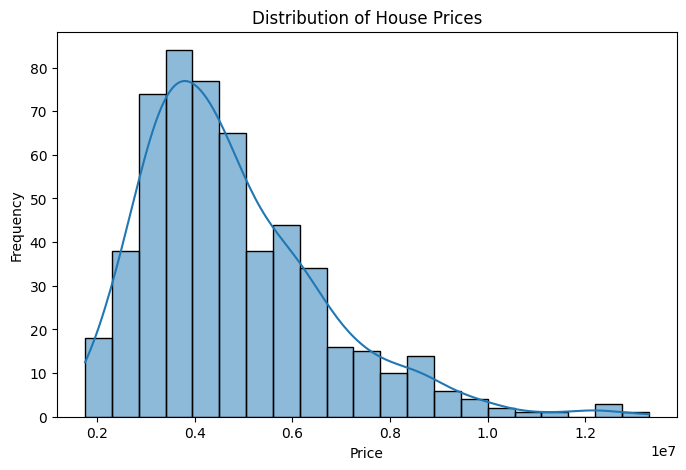

Price Skewness: 1.2122388370279802


In [12]:
# Visualize distribution of house prices
# This helps identify skewness and overall spread of the target variable

plt.figure(figsize=(8,5))
sns.histplot(df["price"], kde=True)

plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Check skewness to understand distribution symmetry
price_skewness = df["price"].skew()
print("Price Skewness:", price_skewness)

**Price Distribution Analysis**

The distribution of house prices appears to be positively skewed (right-skewed). 

This is supported by the skewness value of 1.21, which indicates an extreme positive skew (> 1). Most houses are concentrated in the lower to mid-price range, while a smaller number of properties have significantly higher prices.

The long right tail suggests the presence of high-value properties that may influence the regression model.

Given this level of skewness (> 1), a log transformation of the `price` variable may be considered in the modeling stage to stabilize variance and improve model performance.


---
##### **Distribution of Furnishing Status**

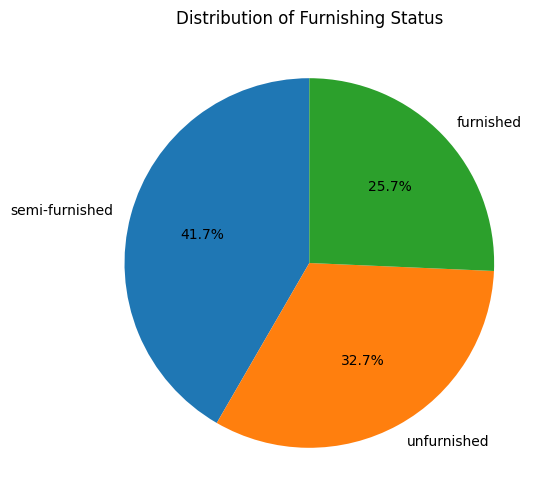

In [26]:
# Visualize distribution of furnishing status categories

furnishing_counts = df["furnishingstatus"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    furnishing_counts,
    labels=furnishing_counts.index,
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Distribution of Furnishing Status")
plt.show()

**Distribution of Furnishing Status**

The pie chart shows the proportion of houses based on furnishing status.

The majority of properties are semi-furnished (41.7%), followed by unfurnished (32.7%) and furnished (25.7%).

The distribution appears relatively balanced, with no extreme dominance from a single category. This indicates that the feature is not highly imbalanced and can be used reliably in further analysis and modeling.


---
##### **Area vs Price Scatter Plot**

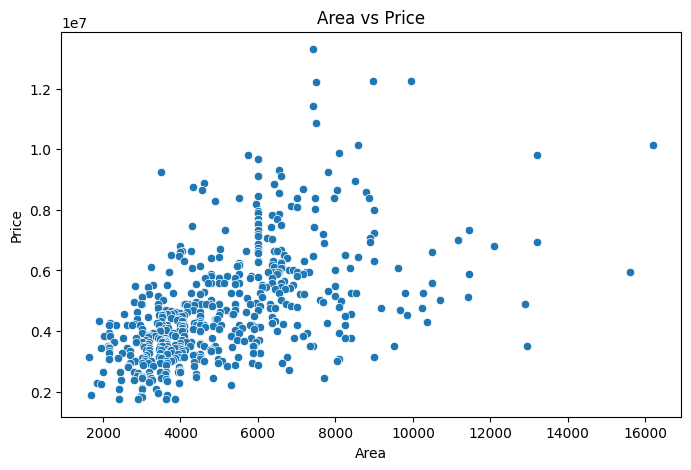

In [13]:
# Scatterplot to observe the relationship between house area and price
# Used to detect linear trends or patterns

plt.figure(figsize=(8,5))
sns.scatterplot(x="area", y="price", data=df)

plt.title("Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

**Area vs Price Analysis**

The scatter plot shows a clear positive relationship between house area and price. As the area increases, the house price generally tends to increase as well.

Although the trend appears upward, the relationship is not perfectly linear. There is noticeable variability among houses with similar areas, indicating that other features in the dataset (such as number of bedrooms, bathrooms, furnishing status, or additional facilities) also contribute to price differences.

Several high-area and high-price observations appear to deviate from the general cluster, which may represent premium properties and could be considered during outlier assessment.

---
##### **Correlation with Price**

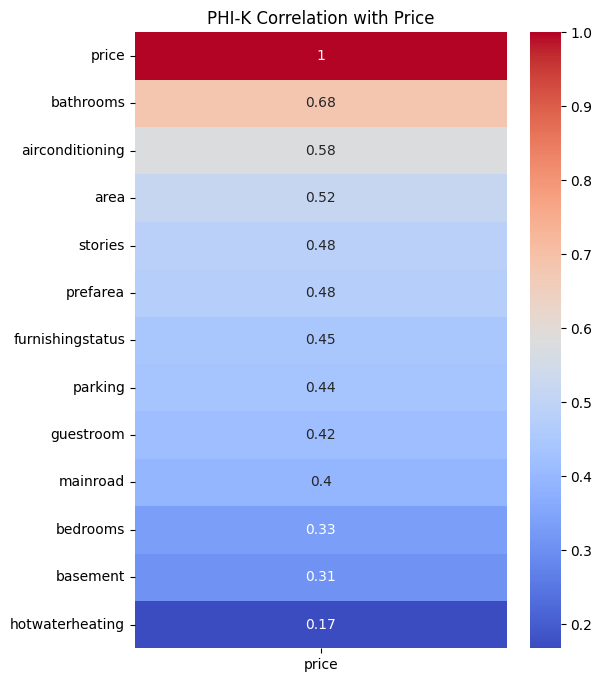

In [20]:
# Compute PHI-K correlation matrix
# PHI-K can measure relationships between numerical and categorical variables

# Select only correlation with target variable
price_corr = phik_corr[["price"]].sort_values(by="price", ascending=False)

# Plot heatmap (single-column matrix)
plt.figure(figsize=(6,8))
sns.heatmap(price_corr, annot=True, cmap="coolwarm")

plt.title("PHI-K Correlation with Price")
plt.show()

**Correlation with Price Analysis**

The PHI-K correlation analysis shows varying levels of association between each feature and the target variable (`price`).

The strongest relationship is observed in:
- `bathrooms` (0.68)
- `airconditioning` (0.58)
- `area` (0.52)

This suggests that houses with more bathrooms, air conditioning, and larger area tend to have higher prices.

Moderate associations are found in:
- `stories`
- `prefarea`
- `furnishingstatus`
- `parking`
- `guestroom`
- `mainroad`

These features also contribute to price variation, although not as strongly as the top predictors.

The weakest relationship appears in:
- `hotwaterheating` (0.17)

Overall, the results indicate that both structural characteristics (area, bathrooms, stories) and facility-related features (air conditioning, furnishing status) influence house prices.
